In [43]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

In [44]:
# read the dataset using pandas
df = pd.read_csv('loan.csv')
df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [45]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accurac
from sklearn.cluster import KMeans

In [46]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
df.shape

(5000, 17)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [49]:
df.isnull().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [50]:
df.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

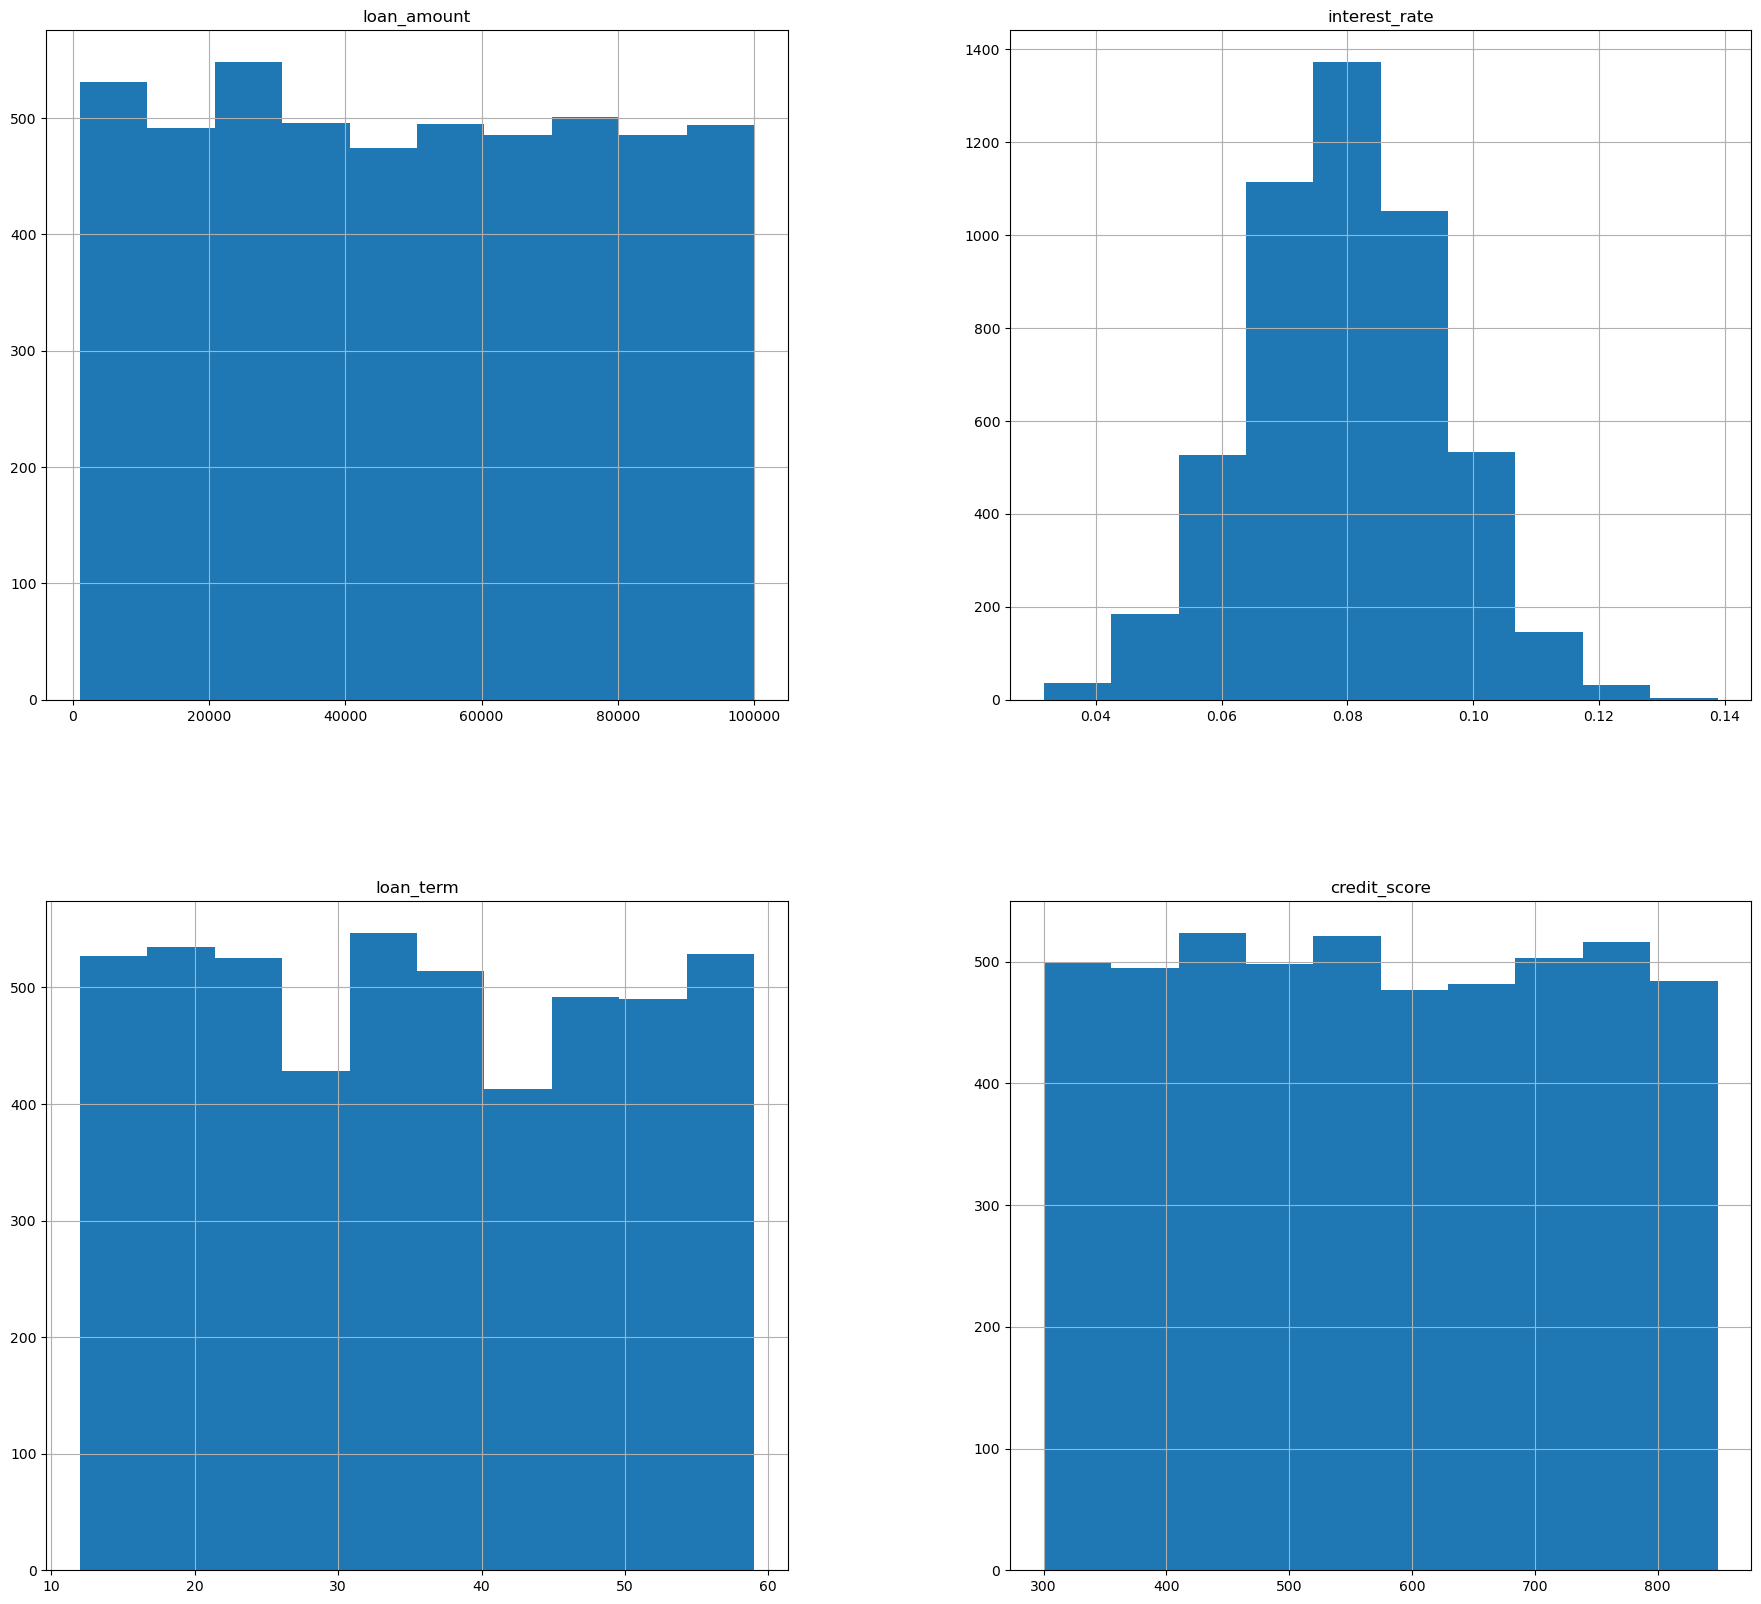

In [51]:
df.hist(figsize=(22,20))
plt.show()

In [52]:
# Check the count of the target variable

df["default_status"].value_counts()

False    4001
True      999
Name: default_status, dtype: int64

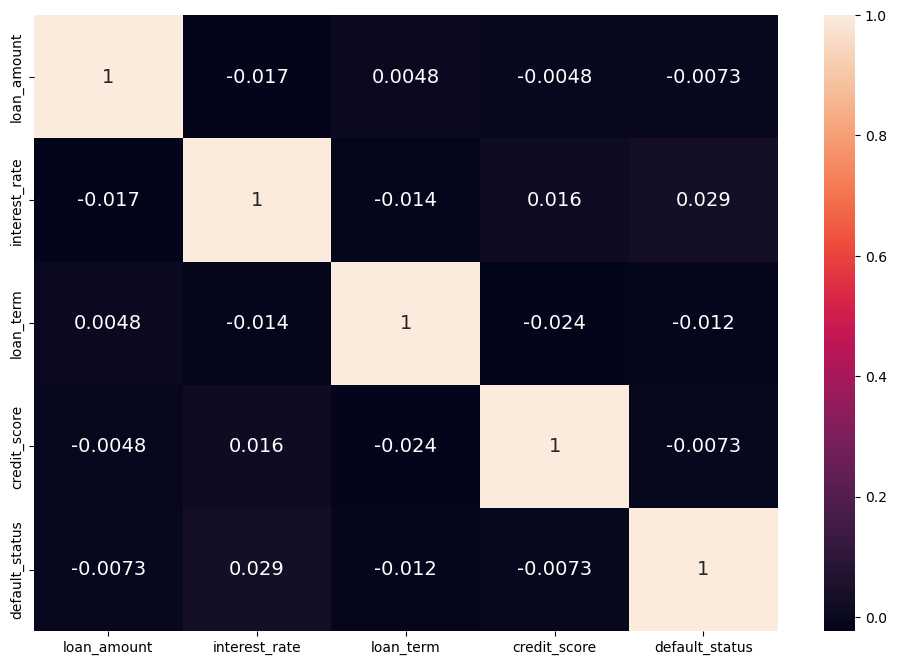

In [53]:
# Correlation Matrix

fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [54]:
# function
def categorical_valcount_hist(feature):
    print(df[feature].value_counts())
    fig, ax = plt.subplots( figsize = (5,5) )
    sns.countplot(x=feature, ax=ax, data=df)
    plt.show()

### Data Distribution

Low       1713
Medium    1672
High      1615
Name: income_level, dtype: int64


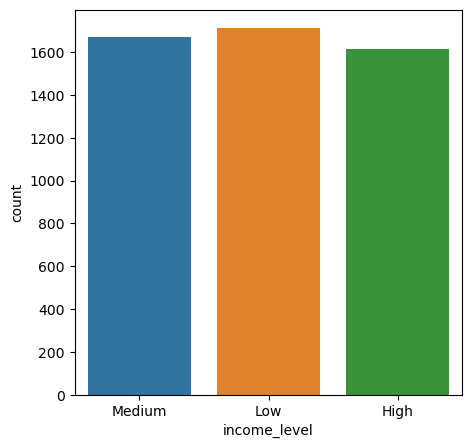

Male      2542
Female    2458
Name: gender, dtype: int64


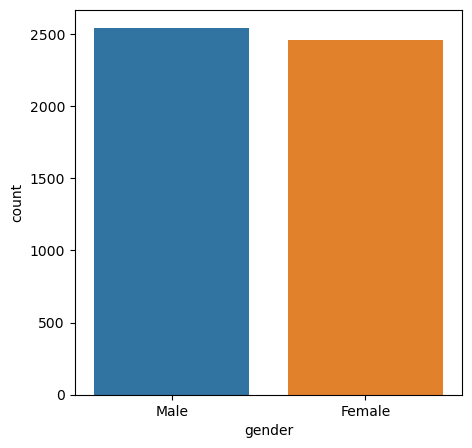

Part-time        1672
Self-employed    1669
Full-time        1659
Name: employment_type, dtype: int64


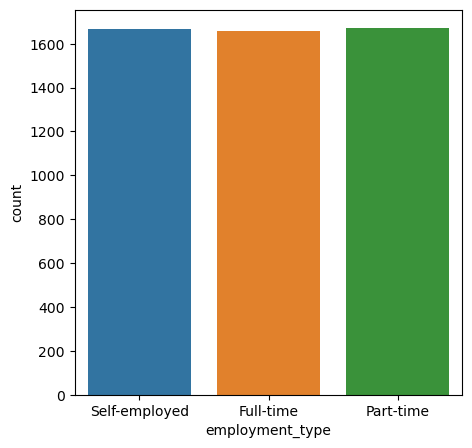

Divorced    1682
Married     1681
Single      1637
Name: marital_status, dtype: int64


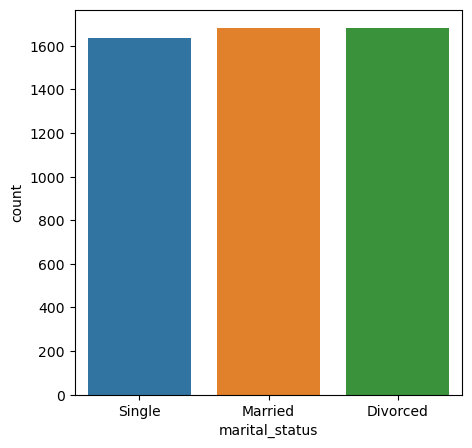

Personal Loan     1281
Car Loan          1273
Home Loan         1264
Education Loan    1182
Name: loan_type, dtype: int64


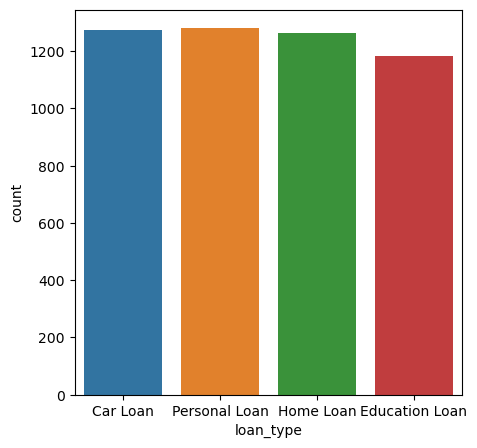

In [55]:
for col in ["income_level","gender","employment_type","marital_status","loan_type"]:
    categorical_valcount_hist(col)


<Axes: xlabel='default_status', ylabel='interest_rate'>

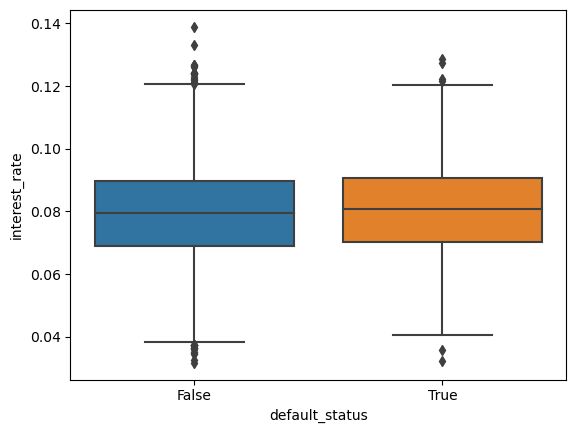

In [56]:
sns.boxplot(data=df, x="default_status", y="interest_rate")

<Axes: xlabel='default_status', ylabel='credit_score'>

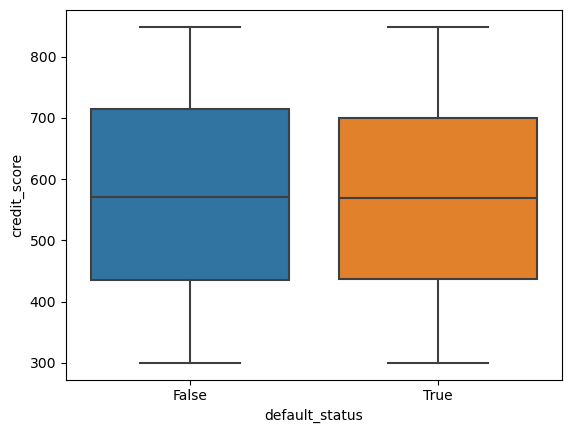

In [57]:
sns.boxplot(data=df, x="default_status", y="credit_score")

<Axes: xlabel='default_status', ylabel='loan_amount'>

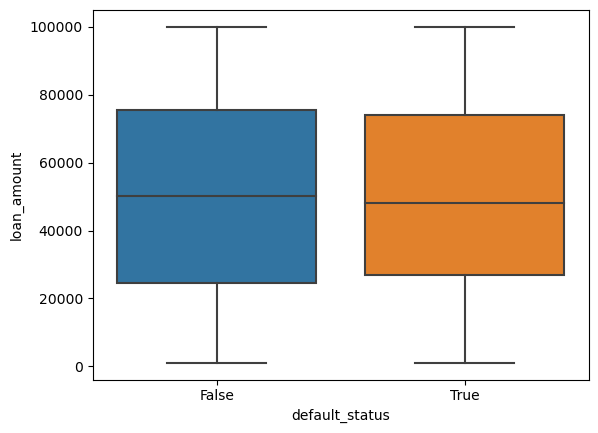

In [58]:
sns.boxplot(data=df, x="default_status", y="loan_amount")

<Axes: xlabel='default_status', ylabel='interest_rate'>

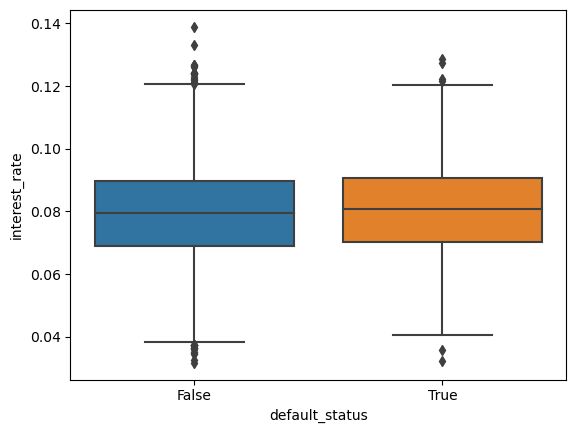

In [59]:
sns.boxplot(data=df, x="default_status", y="interest_rate")

<Axes: xlabel='loan_type', ylabel='count'>

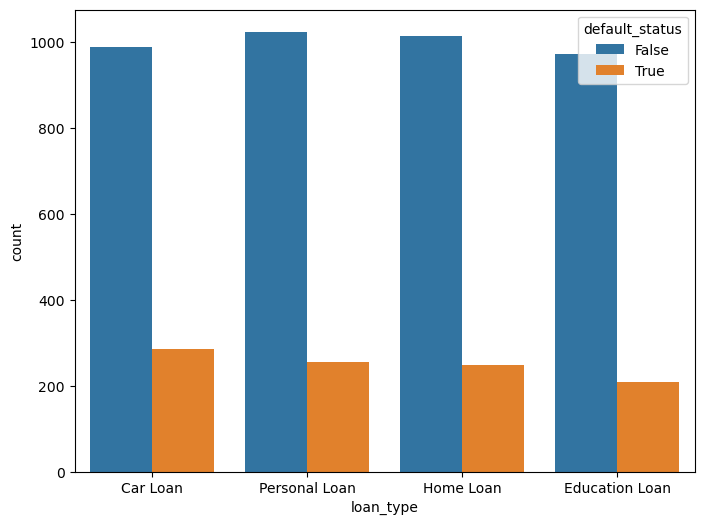

In [60]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='loan_type', hue='default_status', ax=ax, data=df)

<Axes: xlabel='employment_type', ylabel='count'>

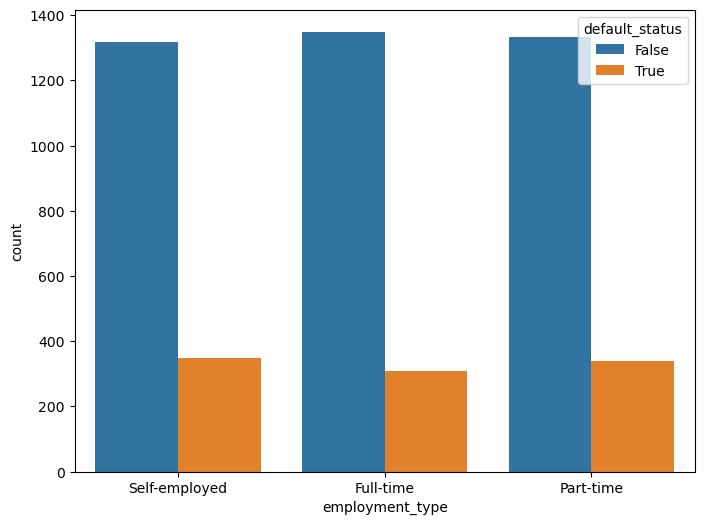

In [61]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='employment_type', hue='default_status', ax=ax, data=df)

<Axes: xlabel='income_level', ylabel='count'>

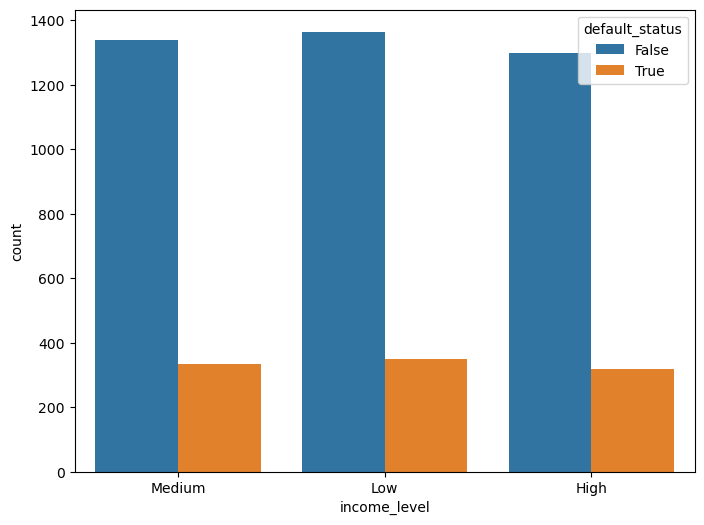

In [62]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='income_level', hue='default_status', ax=ax, data=df)

<Axes: xlabel='education_level', ylabel='count'>

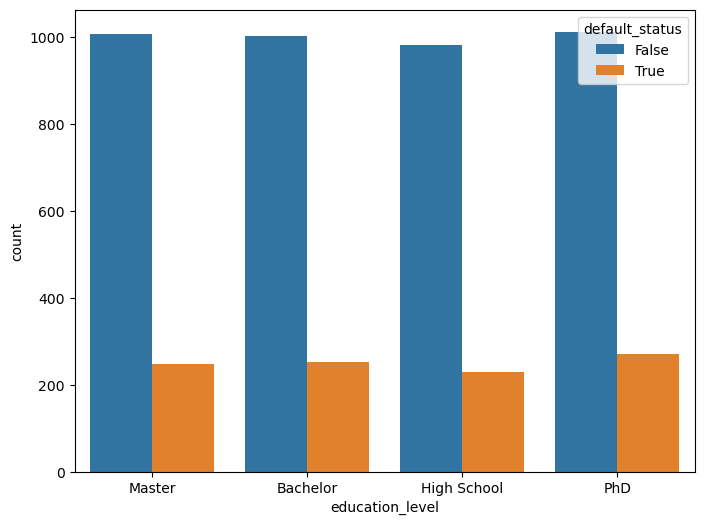

In [63]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='education_level', hue='default_status', ax=ax, data=df)

<Axes: xlabel='marital_status', ylabel='count'>

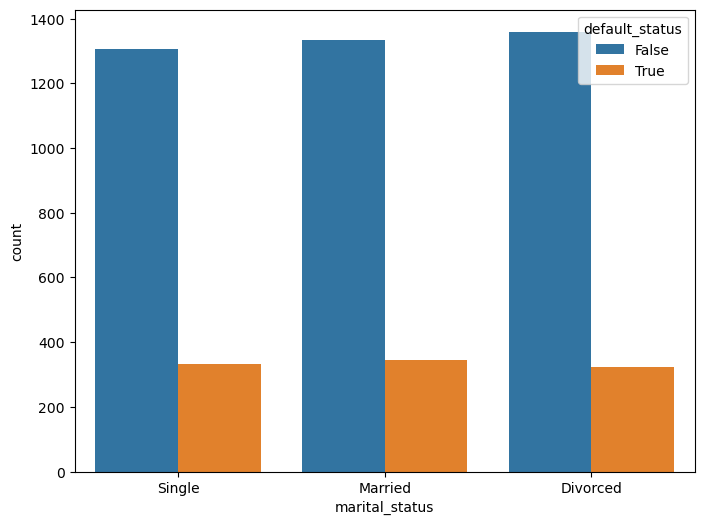

In [64]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='marital_status', hue='default_status', ax=ax, data=df)

In [65]:
cols = ['customer_id', 'loan_id', 'approval_date', 'disbursement_date','due_date','application_date']

df1= df.drop(cols, axis=1)

In [66]:
df1.head()

# nominal(one hot encoder), # ordianl(label encoder)

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,False
1,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,False
2,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,False
3,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,False
4,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,False


### Encoding the categorical variables

In [67]:

new_df = pd.get_dummies(df1)

new_df

,loan_amount,interest_rate,loan_term,credit_score,default_status,loan_type_Car Loan,loan_type_Education Loan,loan_type_Home Loan,loan_type_Personal Loan,employment_type_Full-time,...,income_level_Medium,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,marital_status_Single,education_level_Bachelor,education_level_High School,education_level_Master,education_level_PhD
0,16795,0.051852,15,833,False,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,1860,0.089296,56,776,False,0,0,0,1,1,...,1,1,0,0,1,0,1,0,0,0
2,77820,0.070470,51,697,False,0,0,0,1,1,...,0,0,1,1,0,0,0,1,0,0
3,55886,0.062155,30,795,False,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,7265,0.070635,48,519,False,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37945,0.070087,57,511,False,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4996,48937,0.056405,50,502,False,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4997,7476,0.064212,58,452,True,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
4998,52756,0.094914,12,728,False,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


### Split  into test and training dataset


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
X = new_df.drop(["default_status"], axis=1)
y = new_df["default_status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression

In [70]:

from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90       820
        True       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Logistic Regression accuracy is: 82.00%


<Axes: >

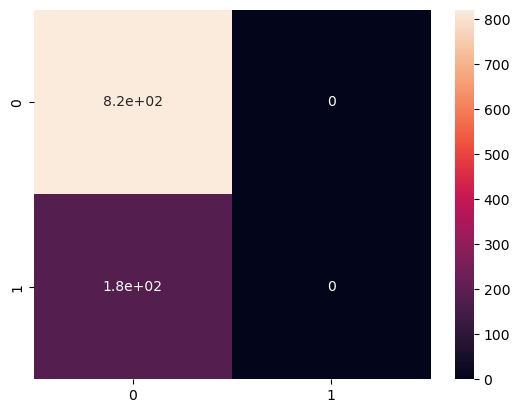

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## SVM

In [72]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='poly')
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90       820
        True       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
SVC accuracy is: 82.00%


<Axes: >

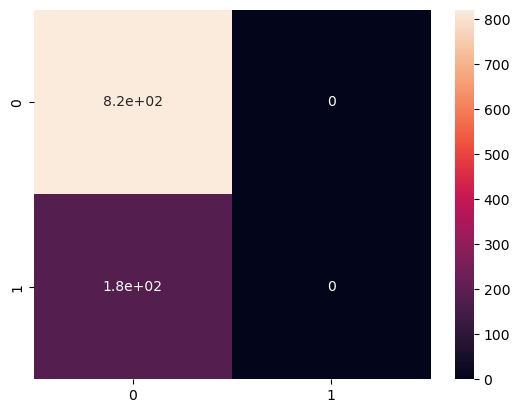

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### Naive Bayes Accuracy

In [74]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       False       0.82      0.99      0.89       820
        True       0.08      0.01      0.01       180

    accuracy                           0.81      1000
   macro avg       0.45      0.50      0.45      1000
weighted avg       0.69      0.81      0.74      1000

[[809  11]
 [179   1]]
Naive Bayes accuracy is: 81.00%


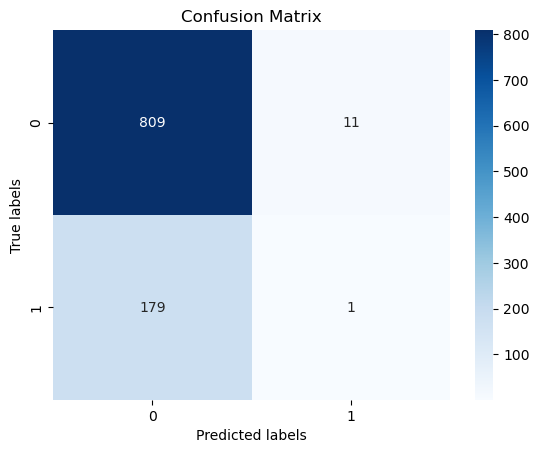

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       False       0.82      0.98      0.89       820
        True       0.12      0.01      0.02       180

    accuracy                           0.81      1000
   macro avg       0.47      0.50      0.46      1000
weighted avg       0.69      0.81      0.74      1000

[[806  14]
 [178   2]]
Decision Tree accuracy is: 80.80%


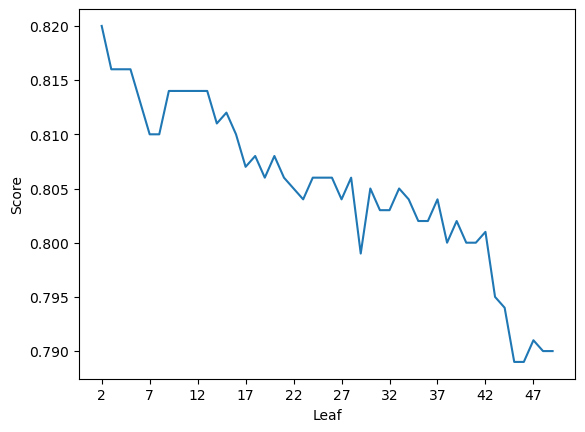

DT Acc Max 82.00%


In [77]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [78]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=2)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90       820
        True       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Decision Tree accuracy is: 82.00%


## Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=2)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score

RFAcc = accuracy_score(y_pred,y_test)

print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90       820
        True       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Random Forest accuracy is: 82.00%


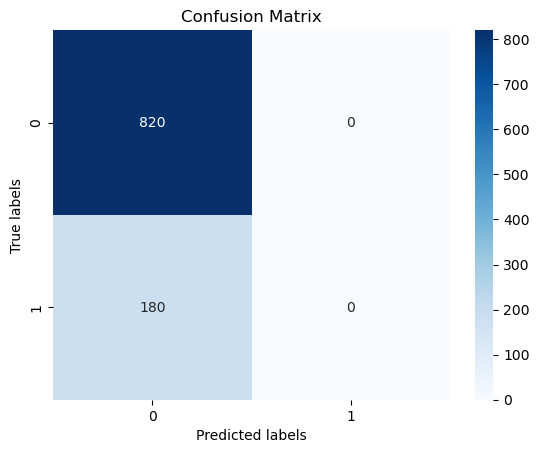

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [81]:
# scoreListRF = []
# for i in range(2,10):
#     RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
#     RFclassifier.fit(X_train, y_train)
#     scoreListRF.append(RFclassifier.score(X_test, y_test))
    
# plt.plot(range(2,50), scoreListRF)
# plt.xticks(np.arange(2,50,5))
# plt.xlabel("RF Value")
# plt.ylabel("Score")
# plt.show()
# RFAccMax = max(scoreListRF)

# print("RF Acc Max {:.2f}%".format(RFAccMax*100))


In [83]:
print(X_test,y_pred)

      loan_amount  interest_rate  loan_term  credit_score  loan_type_Car Loan  \
398         51993       0.085013         59           611                   0   
3833        50847       0.059908         27           601                   1   
4836        27489       0.068412         29           819                   0   
4572        88051       0.077474         32           763                   0   
636          2062       0.095112         50           391                   1   
...           ...            ...        ...           ...                 ...   
4228         6451       0.077407         48           302                   0   
2367        32910       0.096789         22           445                   1   
788         73474       0.092925         50           762                   1   
1452        60129       0.086904         17           463                   0   
3265         2089       0.071003         51           611                   0   

      loan_type_Education L

In [84]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
importances = mutual_info_classif(X, y)

In [86]:
feat_importances = pd.Series(importances, new_df.columns[0:len(new_df.columns)-1])

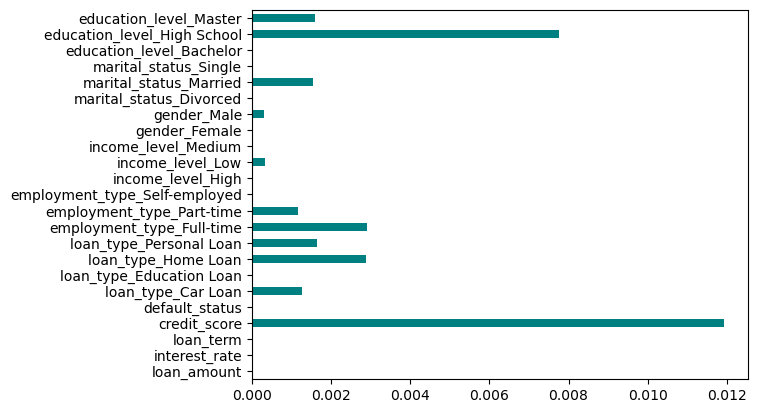

In [87]:
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [88]:
def use_model():
    median_age = float(input("Enter Median Age: "))
    median_income = float(input("Enter Median Income: "))
    population = float(input("Enter population: "))
    
    test_df = pd.DataFrame({"Age": [median_age],
                          "Income": [median_income],
                          "Population": [population]})
    
    predictions = lr.predict(test_df)
    
    print("The approximate value of the house could be: ", str(predictions))

### Naive Bayes

In [89]:
# Naive Bayes from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import CategoricalNB

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       False       0.82      0.99      0.89       820
        True       0.08      0.01      0.01       180

    accuracy                           0.81      1000
   macro avg       0.45      0.50      0.45      1000
weighted avg       0.69      0.81      0.74      1000

[[809  11]
 [179   1]]
Naive Bayes accuracy is: 81.00%


### GaussianNB

In [90]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))


              precision    recall  f1-score   support

       False       0.82      1.00      0.90       820
        True       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
Gaussian Naive Bayes accuracy is: 82.00%


In [91]:
## Model Comparision

compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM',  'Decision Tree','Random Forest', "Naive Bayes", "Gaussian"], 
                        'Accuracy': [LRAcc*100,SVCAcc*100,  DTAcc*100, RFAcc*100,NBAcc1*100,NBAcc2*100 ]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.0
1,SVM,82.0
2,Decision Tree,82.0
3,Random Forest,82.0
5,Gaussian,82.0
4,Naive Bayes,81.0


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

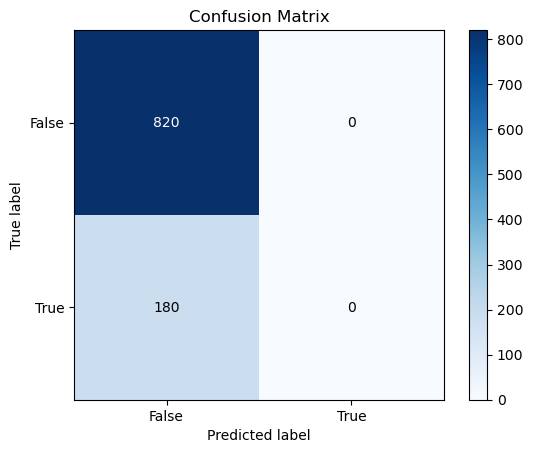

In [92]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [93]:
#!pip install scikit-plot


### KNeighbours Claassifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test.values)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90       820
        True       0.00      0.00      0.00       180

    accuracy                           0.82      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.67      0.82      0.74      1000

[[820   0]
 [180   0]]
K Neighbours accuracy is: 82.00%


In [ ]:
scoreListKN = []
for i in range(2,50):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(X_train, y_train)
    scoreListKN.append(KNclassifier.score(X_test.values, y_test))
    
plt.plot(range(2,50), scoreListKN)
plt.xticks(np.arange(2,50,5))
plt.xlabel("KN Value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListRF)
print("KNeighbours Acc Max {:.2f}%".format(KNAccMax*100))

In [109]:
 #Model Comparision

compare = pd.DataFrame({'Model': ['Logistic Regression', 'SVM',  'Decision Tree','Random Forest', "Naive Bayes", "Gaussian","KNNClassifier"], 
                        'Accuracy': [LRAcc*100,SVCAcc*100,  DTAcc*100, RFAcc*100,NBAcc1*100,NBAcc2*100,KNAcc*100 ]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.0
1,SVM,82.0
2,Decision Tree,82.0
3,Random Forest,82.0
5,Gaussian,82.0
6,KNNClassifier,82.0
4,Naive Bayes,81.0


### From the results, it can be seen that most of ML models can reach up to 82% accuracy in predicting classification of loan default_status.